# Capstone project by < Tanya Golubev > 

# < Salary predicition >

## 1) The problem

#### I want to explore the dependency of a person's income on her/his background, such as education, social status and capital. 

This should point out whether the most important factors for prosperity are within the free choice of a person or are predefined by her/his preconditions. 

The limitiations of the survey include:
1) The restriction of the data to a small population of US citizens
2) The survey took place 25 ears ago, the situation might have changed
3) The real set of features that can influence the person's income is much broader than the one in the database

## 2) The data

#### This database can be found at https://archive.ics.uci.edu/ml/datasets/Census-Income+%28KDD%29
Extraction was done by Barry Becker from the 1994 Census database https://data.census.gov/cedsci/.

The dataset consistis of 199523 entries and 42 columns. It contains 14 numerical and 28 categorical features.

The feature description can be found following the first link and will be attached as a separate file to github repository.

In [1]:
# Download the dataset
import numpy as np
import pandas as pd

df = pd.read_csv('census-income.data', sep=',', engine='python', header = None)

print(df.shape)
df.head()

(199523, 42)


,0,1,2,3,4,5,6,7,8,9,...,32,33,34,35,36,37,38,39,40,41
0,73,Not in universe,0,0,High school graduate,0,Not in universe,Widowed,Not in universe or children,Not in universe,...,United-States,United-States,United-States,Native- Born in the United States,0,Not in universe,2,0,95,- 50000.
1,58,Self-employed-not incorporated,4,34,Some college but no degree,0,Not in universe,Divorced,Construction,Precision production craft & repair,...,United-States,United-States,United-States,Native- Born in the United States,0,Not in universe,2,52,94,- 50000.
2,18,Not in universe,0,0,10th grade,0,High school,Never married,Not in universe or children,Not in universe,...,Vietnam,Vietnam,Vietnam,Foreign born- Not a citizen of U S,0,Not in universe,2,0,95,- 50000.
3,9,Not in universe,0,0,Children,0,Not in universe,Never married,Not in universe or children,Not in universe,...,United-States,United-States,United-States,Native- Born in the United States,0,Not in universe,0,0,94,- 50000.
4,10,Not in universe,0,0,Children,0,Not in universe,Never married,Not in universe or children,Not in universe,...,United-States,United-States,United-States,Native- Born in the United States,0,Not in universe,0,0,94,- 50000.


In [2]:
#create a list of column names
column_names = ["age", "class of worker", "detailed industry record", "detailed occupation record","education","wage per hour",
               "enroll in edu inst last wk","marital stat","major industry code","major occupation code","race","hispanic origin",
               "sex","member of a labor union","reason for unemployment","full or part time employment stat","capital gains",
               "capital losses","dividends from stocks","tax filer stat","region of previous residence","state of previous residence",
               "detailed household and family stat","detailed household summary in household","instance weight","migration code-change in msa",
               "migration code-change in reg","migration code-move within reg","live in this house 1 year ago","migration prev res in sunbelt",
               "num persons worked for employer","family members under 18","country of birth father","country of birth mother","country of birth self",
                "citizenship","own business or self employed","fill inc questionnaire for veterans admin","veterans benefits","weeks worked in year",
                "year","income"]

#Assign the list to column names
df.columns = column_names

#drop the column "instance weight" as suggested at the description file 'census-income.names'
df.drop(['instance weight'], axis=1, inplace = True)

print(df.shape)

(199523, 41)


#### I aim to predict the annual income, whether it is more that 50K annually or less.

In [3]:
df['income'].unique()

array([' - 50000.', ' 50000+.'], dtype=object)

In [4]:
# Make a target variable a binary one
df['income'] = df['income'].astype(str).str.replace(' - 50000.', '0')
df['income'] = df['income'].astype(str).str.replace(' 50000+..', '1')

#check the replacement
df['income'] = pd.to_numeric(df['income'])
print(df['income'].unique())

[0 1]


What is the class distribution for the target variable? 

In [5]:
#class distribuiton
labels_list, labels_count = np.unique(df['income'], return_counts=True, axis=None)
print ('List of labels:',labels_list)
print ('Class distribution:',100*labels_count/df.shape[0])

List of labels: [0 1]
Class distribution: [93.79419917  6.20580083]


There is a need to keep in mind that the dataset is unbalanced: both when splitting the data and when choosing the approach to build a model.

#### Missing values

In [6]:
#Are there missing values?
df_null= df.isnull().sum()
print('The amount of missimg values:', df_null.sum())

The amount of missimg values: 0


There is no formally missing data,but it is hidden under other signs, like '?' or 'Not in universe'. (Insight from the description file and scrolling through the dataset.)

In [7]:
df=df.replace("\?", np.nan, regex=True)

In [8]:
#Create a database reflecting amount of missing values and data types

#Create an additinal DataFrame, reflecting amount of missing values per each column
df_null= df.isnull().sum()
#add data type
data_missing =  {'N_val_quest': df_null, 'dtypes': df[df_null.index].dtypes}
df_data_missing  = pd.DataFrame(data_missing) 
df_data_missing.sort_values(by = ['dtypes'], ascending = False, inplace = True)
df_data_missing

#Add a column reflecting the amount of "Not in universe" per (categorical) feature
df_objects = df_data_missing[df_data_missing['dtypes'] == 'object'].index

NiU= []
for i in range (len(df_objects)):
    NiU.append (df[df_objects[i]].astype(str).str.contains('Not in universe').sum())
    
#add zeros to all features whos data type is not "object"
Zeros = np.zeros (len(df_data_missing.index) - len(df_objects))
   
NiU = np.array(NiU)

df_data_missing['N_val_Not in Universe'] = np.append(NiU,Zeros)
df_data_missing.sort_values(by = ['dtypes', 'N_val_Not in Universe'], ascending = False, inplace = True)
df_data_missing

,N_val_quest,dtypes,N_val_Not in Universe
fill inc questionnaire for veterans admin,0,object,197539.0
reason for unemployment,0,object,193453.0
enroll in edu inst last wk,0,object,186943.0
region of previous residence,0,object,183750.0
state of previous residence,708,object,183750.0
member of a labor union,0,object,180459.0
family members under 18,0,object,144232.0
live in this house 1 year ago,0,object,101212.0
major occupation code,0,object,100684.0
major industry code,0,object,100684.0


 I do not plan to distinguish the questions marks from the "Not in universe" entry later on and will treat them equally as missing values.

In [9]:
#replase 'Not in universe' with NaN
df=df.replace('Not in universe', np.nan, regex=True)
#Are there missing values now?
df_null= df.isnull().sum()
print('The amount of missimg values:', df_null.sum())

The amount of missimg values: 2177270


There can also be hidden missing values in numeric features. For example, missing values that occur as zeros.

They are very hard to track, as the income can come from very different sources and the database do not cover all of them. So I won't try to trace them.

#### Additional feature - amount of missing values in the entry

In [10]:
df['N_miss_val'] = df.isnull().sum(axis=1)

#### Duplicates

In [11]:
#Are there complete duplicates (in rows)?
print ('Amount of duplicated rows:',df.duplicated().sum(), 'in percentage:',  df.duplicated().sum()/df.shape[0])
#Are there complete duplicates (in columns)? If yes, delete them!
print ('Amount of columns in the initial database:',df.shape[1])
df =df.dropna(axis = 1, how = "all")
print ('Amount of columns after deleting completely identical columns:',df.shape[1])

Amount of duplicated rows: 46627 in percentage: 0.23369235626970325
Amount of columns in the initial database: 42
Amount of columns after deleting completely identical columns: 42


In [12]:
#display the duplicated rows. How much do they have in common?
df[df.duplicated()]

,age,class of worker,detailed industry record,detailed occupation record,education,wage per hour,enroll in edu inst last wk,marital stat,major industry code,major occupation code,...,country of birth mother,country of birth self,citizenship,own business or self employed,fill inc questionnaire for veterans admin,veterans benefits,weeks worked in year,year,income,N_miss_val
121,2,NaN,0,0,Children,0,NaN,Never married,NaN,NaN,...,United-States,United-States,Native- Born in the United States,0,NaN,0,0,94,0,10
226,6,NaN,0,0,Children,0,NaN,Never married,NaN,NaN,...,United-States,United-States,Native- Born in the United States,0,NaN,0,0,94,0,10
243,3,NaN,0,0,Children,0,NaN,Never married,NaN,NaN,...,United-States,United-States,Native- Born in the United States,0,NaN,0,0,94,0,10
305,10,NaN,0,0,Children,0,NaN,Never married,NaN,NaN,...,United-States,United-States,Native- Born in the United States,0,NaN,0,0,95,0,14
344,1,NaN,0,0,Children,0,NaN,Never married,NaN,NaN,...,United-States,United-States,Native- Born in the United States,0,NaN,0,0,95,0,14
353,12,NaN,0,0,Children,0,NaN,Never married,NaN,NaN,...,United-States,United-States,Native- Born in the United States,0,NaN,0,0,95,0,14
359,12,NaN,0,0,Children,0,NaN,Never married,NaN,NaN,...,United-States,United-States,Native- Born in the United States,0,NaN,0,0,95,0,14
382,1,NaN,0,0,Children,0,NaN,Never married,NaN,NaN,...,United-States,United-States,Native- Born in the United States,0,NaN,0,0,95,0,14
405,15,NaN,0,0,7th and 8th grade,0,NaN,Never married,NaN,NaN,...,United-States,United-States,Native- Born in the United States,0,NaN,2,0,94,0,10
422,0,NaN,0,0,Children,0,NaN,Never married,NaN,NaN,...,United-States,United-States,Native- Born in the United States,0,NaN,0,0,94,0,14



May be the duplicates are the entries lacking information? 

In [13]:
df['N_miss_val'][df.duplicated()].value_counts()

14    20460
10    15391
15     4348
11     4050
13      709
9       622
7       402
12      257
8       199
16       89
17       74
6        22
18        4
Name: N_miss_val, dtype: int64

The majority of duplicated entries have a lot of missing values, but not the maxixmum. And this parameter varies.

In [14]:
#check how education is connected to the amount of missing values
df['education'][df.duplicated()].value_counts()

 Children                                  34712
 High school graduate                       4765
 7th and 8th grade                          1698
 Some college but no degree                 1491
 9th grade                                  1254
 10th grade                                 1070
 11th grade                                  663
 Bachelors degree(BA AB BS)                  474
 5th or 6th grade                            138
 Associates degree-occup /vocational         109
 Masters degree(MA MS MEng MEd MSW MBA)       81
 12th grade no diploma                        67
 1st 2nd 3rd or 4th grade                     44
 Associates degree-academic program           41
 Less than 1st grade                          17
 Prof school degree (MD DDS DVM LLB JD)        2
 Doctorate degree(PhD EdD)                     1
Name: education, dtype: int64

The majority of the duplicated entries are in the 'children' column. However, there are all kinds of other types in the 'education' column.
It is reasonable that children have a lot of missing values and a similar spectrum of other features in this database, focused on education and working experience.

There is a rather big amount of duplicated rows, that  seem to represent real persons that have the same characteristics within given features. 

Thus by deleting the duplicates I can artificially skew the database. 

It can still be that the dublicates are artificial, but I see no clear way to distinguish these options. I will leave the duplicates.



## 3) Exploratory data analysis (EDA)

#### Feature description

In [15]:
#select numeric features
cont_columns_idx = df.columns[df.dtypes == 'int64']
cont_columns_idx

Index(['age', 'detailed industry record', 'detailed occupation record',
       'wage per hour', 'capital gains', 'capital losses',
       'dividends from stocks', 'num persons worked for employer',
       'own business or self employed', 'veterans benefits',
       'weeks worked in year', 'year', 'income', 'N_miss_val'],
      dtype='object')

In C:\Users\Tanya\Miniconda3\envs\exts-ml\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test.mplstyle: 
The savefig.frameon rcparam was deprecated in Matplotlib 3.1 and will be removed in 3.3.
In C:\Users\Tanya\Miniconda3\envs\exts-ml\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test.mplstyle: 
The verbose.level rcparam was deprecated in Matplotlib 3.1 and will be removed in 3.3.
In C:\Users\Tanya\Miniconda3\envs\exts-ml\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test.mplstyle: 
The verbose.fileo rcparam was deprecated in Matplotlib 3.1 and will be removed in 3.3.


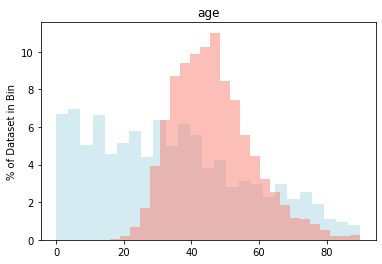

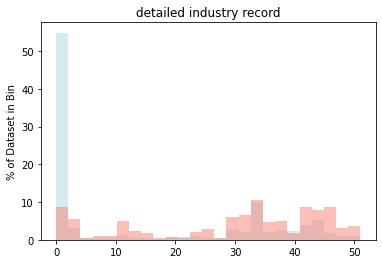

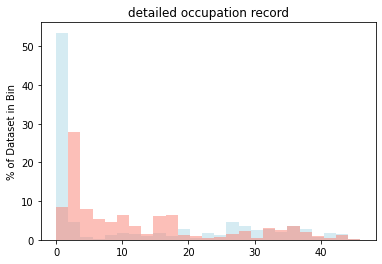

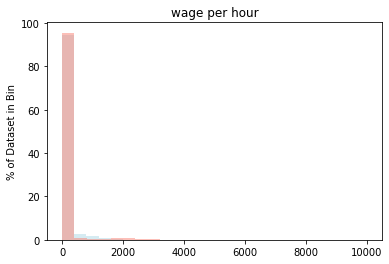

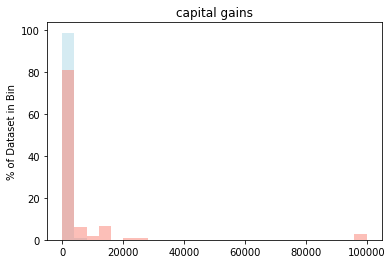

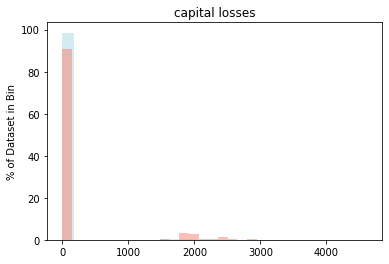

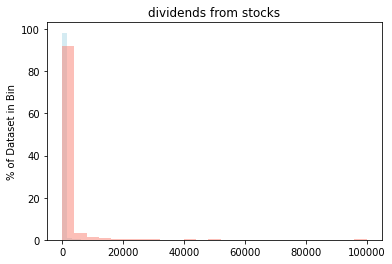

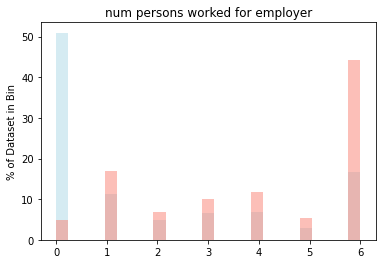

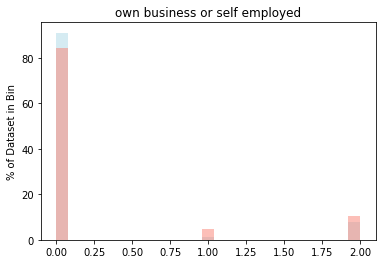

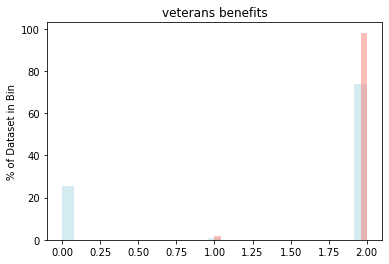

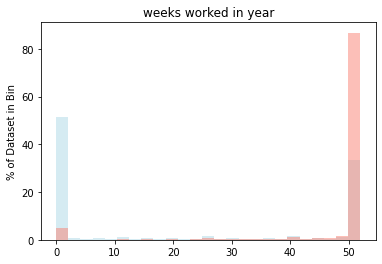

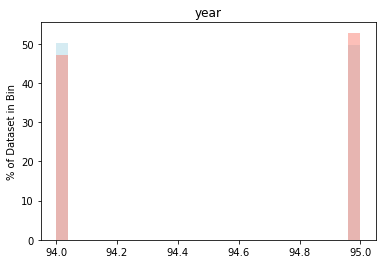

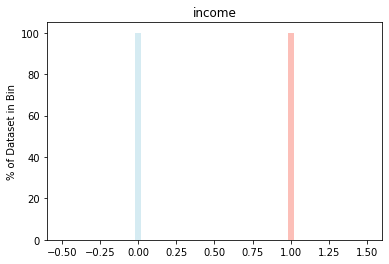

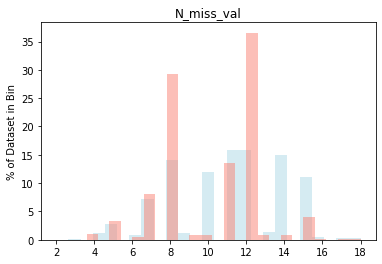

In [16]:
#Now I plot a histogram of these features

#import visualisation libraries
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns

#choose the numeric features
cont_columns_idx = df.columns[df.dtypes == 'int64']

#display the normalized distributions of target variable classes
for cont_feature in cont_columns_idx:

    #separate by the value of the target variable (income)
    x= df[cont_feature][df.income == 0]
    y= df[cont_feature][df.income == 1]


    #normalize the distributions
    xweights = 100 * np.ones_like(x) / x.size
    yweights = 100 * np.ones_like(y) / y.size

    fig, ax = plt.subplots()
    ax.hist(x, weights=xweights, color='lightblue', bins = 25,  alpha=0.5)
    ax.hist(y, weights=yweights, color='salmon', bins = 25, alpha=0.5)

    ax.set(title=cont_feature, ylabel='% of Dataset in Bin')
    ax.margins(0.05)
    ax.set_ylim(bottom=0)
    plt.show()

Based on the histograms,  people that earned more than 50K per year tend to be older, have longer industry record and work in different areas, compared to people with lower income (differences in 'detailed occupational record'). They also more often work the whole year around.

Also people with higher wages have more changes in capital (gains, losses, have dividends from stock). Instead of dealing with outliers in these  very sckewed distributions I plan to make binary features with a certain threshold.

People with higher wages more often work in big companies or have their own busines.

Suprisingly, there are differences in the number of people with high salaries from from 94 and 95 years. May be there is an inflation and may be the economy growth stronger, but still I did not expect to see a change within a year.


#### Adding logarythmic features

In [17]:
# create a list of features I want to take a logarithm of

logarithm_list = ['capital gains', 'capital losses', 'dividends from stocks', 'wage per hour']

In [18]:
# Function to add logarithmic features and to give them new names
def create_log_features(data_df, column_list):
    #it is very important to specify the type, by default it is int8
    basal_log_features = data_df[column_list].values.astype(np.int64)
    #set initial parameters to be deleted
    log_features = np.zeros(basal_log_features.shape[0])
    log_features_names = ''
    for column in range (len(column_list)):
        
        #for the numbers
        new_log = np.log1p(basal_log_features[:,column])
        log_features = np.column_stack((log_features, new_log))
        
        #for the column names
        initial_name = column_list [column]
        log_names = ['{}_{}'.format(initial_name, 'log')]
        log_features_names = np.append (log_features_names, log_names)
        
    #delete first elements not carrying meaningful information
    log_features = np.delete(log_features, 0, axis = 1)
    log_features_names = np.delete (log_features_names, 0)
    
    return log_features, log_features_names

In [19]:
log_features, log_features_names = create_log_features (df, logarithm_list)
data_log = pd.DataFrame (data = log_features, columns = log_features_names)
data_log.dtypes

capital gains_log            float64
capital losses_log           float64
dividends from stocks_log    float64
wage per hour_log            float64
dtype: object

In [20]:
# add the log features to the dataframe
# reset index to avoid adding new rows to a dataframe and delete the first column
df = pd.concat ([df.reset_index().drop ('index', axis = 1), data_log], axis = 1)
df.shape

(199523, 46)

#### Feature relationships 

In [21]:
cont_columns_idx = df.columns[(df.dtypes == 'int64') | (df.dtypes == 'float64')]
cont_columns_idx

Index(['age', 'detailed industry record', 'detailed occupation record',
       'wage per hour', 'capital gains', 'capital losses',
       'dividends from stocks', 'num persons worked for employer',
       'own business or self employed', 'veterans benefits',
       'weeks worked in year', 'year', 'income', 'N_miss_val',
       'capital gains_log', 'capital losses_log', 'dividends from stocks_log',
       'wage per hour_log'],
      dtype='object')

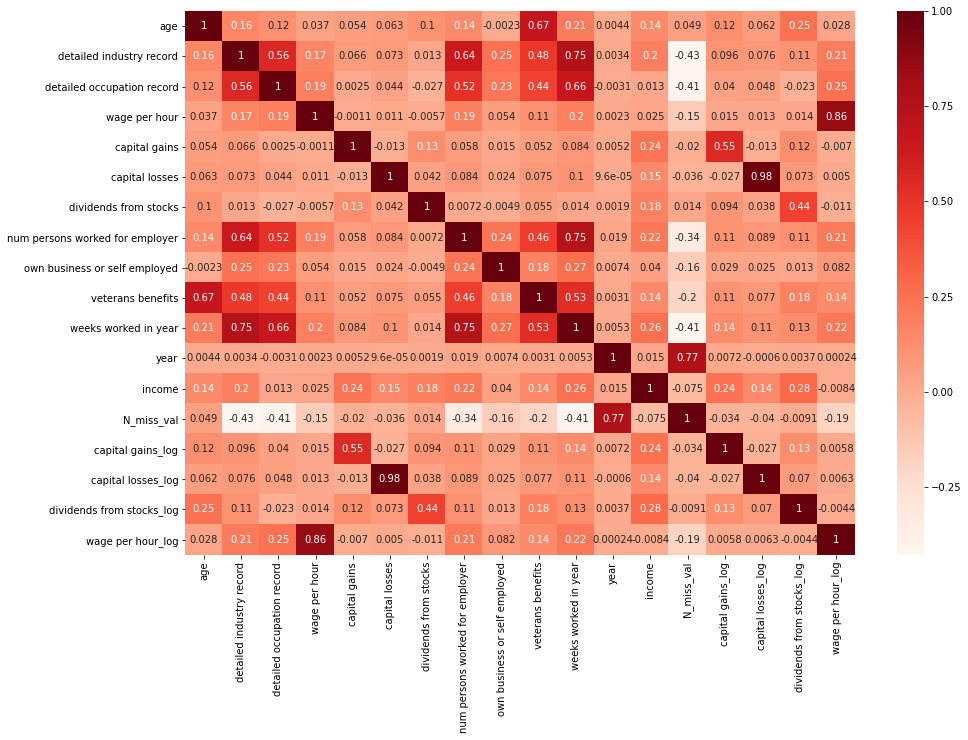

In [22]:
plt.figure(figsize = (15,10))
cor = df[cont_columns_idx].corr()

sns.heatmap (cor, annot = True, cmap = plt.cm.Reds)
plt.show()

The features are quite uncorrelated one with another. Only few have a correlation higher than 0.5, like the amount of weeks worked in a year and industry or occupational record. The industry record is also correlated with the amount of employees in a business. 

This will be eliminated as the industry code is not a true continuous variable, and, together with the occupation record, will be one-hot encoded.

Interestingly, the number of missing values is highly correlated with the year when the information was gathered, while these features are hardly correlated with any other feature.

In [23]:
#dropping the highly correlated features
print(df.shape)
df.drop(['year', 'capital gains', 'capital losses', 'dividends from stocks'], axis = 1, inplace = True)
print(df.shape)

(199523, 46)
(199523, 42)


#### One-hot encoding

In [24]:
 #I need to convert numerical columns to 'object' class in order to perform one-hot encoding
df = df.astype({'detailed industry record':'object', 'detailed occupation record':'object'}, copy = False)

In [25]:
# create a list of nominal categorical variables
cat_columns_idx = df.columns[df.dtypes == 'object']
cat_columns_idx
print('N of categorical features before one-hot encoding:', len(cat_columns_idx))

N of categorical features before one-hot encoding: 30


In [26]:
#one-hot encoding
one_hot_df = pd.get_dummies(df[cat_columns_idx], prefix = cat_columns_idx)
one_hot_df.shape

(199523, 472)

In [27]:
#substitude the categorical features with the one-hot encoded ones
df = pd.concat ([df, one_hot_df], axis = 1)
df = df.drop(cat_columns_idx, axis = 1)
df.shape

(199523, 484)

### Dimensionality reduction

As there are a lot of categorical variables with high cardinality (various options), one-hot encoding dramatically increased the number of features. 

There is a number of opitons for dimensionality reduction.


The simpliest ones are built on removing features with the lowest variance  (PCA) or based on univariate statistical tests.
Other options are based on ML models, such as LinearSVC, Logistic Regression and tree-based models. 


As a descision tree alone is usually a weak classifier and tree-based models require long computing times, I will concetrate on L1-based feature selection for classification problems using LinearSVC and Logistic Regression estimators. These estimators are designed with the assumption that each feature takes values close to zero or more importantly that all features vary on comparable scales.

For these estimators to convert, I need to avoid ill conditioning and scale the data.

Thus, I will reduce the dimensionality in 3 steps:

    1) get rid of the features with extremely low variance
    
    2) scale the data using StandartScaler (no extreme outlieres were observed during EDA)
    
    3) use  LinearSVC and Logistic Regression estimators with L1 metrics

In [28]:
#define X and y
X = df.drop('income', axis = 1).values
print('X shape:', X.shape)
y = df['income'].values
print('y shape:', y.shape)

X shape: (199523, 483)
y shape: (199523,)


In [29]:
#Keep track of features names
df_columns_complete =df.drop('income', axis = 1).columns

In [30]:
#geting rid of the features with extremely low variance
from sklearn.feature_selection import VarianceThreshold
sel = VarianceThreshold(threshold=(.999 * (1 - .999)))
X = sel.fit_transform(X)
print(X.shape)
#Keep track of features names
df_columnds_red1 = df_columns_complete [sel.get_support()]

#Scaling the data using StandartScaler
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X = scaler.fit_transform(X, y = None)

(199523, 388)


In [31]:
#Import the libraies for the L1-based feature selection
from sklearn.svm import LinearSVC
from sklearn.linear_model import LogisticRegression
from sklearn.feature_selection import SelectFromModel

Before incorporating dimensionality reduction into a pipeline, I want to see with which coefficients the estimators converge and result in a reasonable reduction of dimensions.

In [32]:
print('N of features in initial dataset:', X.shape[1])
for coef in [0.001, 0.01, 0.1]:
    lsvc = LinearSVC(C=coef, penalty="l1", dual=False).fit(X, y)
    model = SelectFromModel(lsvc, prefit=True)
    X_new = model.transform(X)
    print('N of featires after feauture reduction by LinearSVM for C', coef, 'is', X_new.shape[1])

    log_reg = LogisticRegression(C=coef, solver='saga', penalty='l1').fit(X, y)
    model = SelectFromModel(log_reg, prefit=True)
    X_new = model.transform(X)
    print('N of featires after feauture reduction by Logistic Regression for C', coef, 'is', X_new.shape[1])

N of features in initial dataset: 388
N of featires after feauture reduction by LinearSVM for C 0.001 is 96
N of featires after feauture reduction by Logistic Regression for C 0.001 is 41


C:\Users\Tanya\Miniconda3\envs\exts-ml\lib\site-packages\sklearn\svm\_base.py:977: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


N of featires after feauture reduction by LinearSVM for C 0.01 is 249
N of featires after feauture reduction by Logistic Regression for C 0.01 is 177


C:\Users\Tanya\Miniconda3\envs\exts-ml\lib\site-packages\sklearn\svm\_base.py:977: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


N of featires after feauture reduction by LinearSVM for C 0.1 is 312


C:\Users\Tanya\Miniconda3\envs\exts-ml\lib\site-packages\sklearn\linear_model\_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


N of featires after feauture reduction by Logistic Regression for C 0.1 is 313


The reasonable coefficient C for LinearSVM is 0.001 (the only one where it convereged). 

The reasonable coefficient C for LogisticRegression is 0.01. The estimator also convereged for  C=0.001, but reduced the amount of features too much, almost by 90%). 

In [33]:
#I choose the reasonable dimensionality reduction with the lower amount of remaining features. The calculations yet pretty long.
lsvc = LinearSVC(C=0.001, penalty="l1", dual=False).fit(X, y)
model = SelectFromModel(lsvc , prefit=True)
X_new = model.transform(X)
print(X_new.shape)
#Keep track of features names
df_columnds_red2 = df_columnds_red1 [model.get_support()]

(199523, 98)


## 4) Machine learning 

### 4.a Prediction task is to determine whether a person makes over 50K a year. It is a binary classification problem.

### 4.b I will use a combination of kNN, RandomForest and Logistic Regression provided by SGD Classifier.

These models use quite different approaches to make predictions, that is why their combination might be benifitial for the prediction power.


1. I will apply these classifiers on their own and find the optimal parameters using grid search.


2. I will compare the performance of individual tuned classifiers with their ensemble using approaches of Max Voting and SuperLearner (that uses predictions of other's models as a feature for the last one) from the ML-Ensemble Library (mlens).

#### K-Nearest Neighbors

In [34]:
#used sklearn verion is 0.23.1
from sklearn.model_selection import train_test_split
#Split the data one to have train and test sets
X_train, X_test, y_train, y_test = train_test_split(X_new, y, test_size=0.25, stratify=y, random_state=123, shuffle=True)


In [35]:
#Take a small potion of data to perform calculations that cause Memory error on a full train set (like kNN)
X_tr_1, X_test_1, y_tr_1, y_test_1 = train_test_split(
    X_train, y_train, test_size=0.9, stratify=y_train, random_state=231, shuffle=True)
#And split it again for the calculations
X_tr_2, X_test_2, y_tr_2, y_test_2 = train_test_split(
    X_tr_1, y_tr_1, test_size=0.3, stratify=y_tr_1, random_state=312, shuffle=True)

In [36]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV
knn = KNeighborsClassifier(n_jobs=-1, algorithm='brute')

#list the parameters to be evaluated
parameters = {
    'n_neighbors' : [13, 17, 25],
    'p' : [1, 2]
    }

#Fit the model
clf1 = GridSearchCV (knn, param_grid=parameters, verbose = 1, cv = 3, scoring = 'f1', return_train_score = True)
#by default GridSearchCV uses stratified kfold  for cross-validation
clf1.fit (X_tr_2, y_tr_2)
#determine the best classifier
kNN_clf = clf1.best_estimator_
#predict the results
y_pred_kNN = clf1.predict (X_test)

Fitting 3 folds for each of 6 candidates, totalling 18 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  18 out of  18 | elapsed:  1.9min finished


In order to train the kNN algorithm on a full train dataset, I tried cashing it using the algorythm available at 
https://scikit-learn.org/stable/auto_examples/neighbors/plot_caching_nearest_neighbors.html#sphx-glr-auto-examples-neighbors-plot-caching-nearest-neighbors-py.

After hours of calculation the algorithm converged, but the open code still seemed to create the graph of the train data each time again, so that there was no great improvement in time. The graph of the fit time looked the same as on an example, but did not reflect the real times.

As improving (or better understanding) the code for cashing kNN is out of the scope for that project, I left that approach for better times.

In [37]:
print('Best kNN:', clf1.best_estimator_)

Best kNN: KNeighborsClassifier(algorithm='brute', n_jobs=-1, n_neighbors=13, p=1)


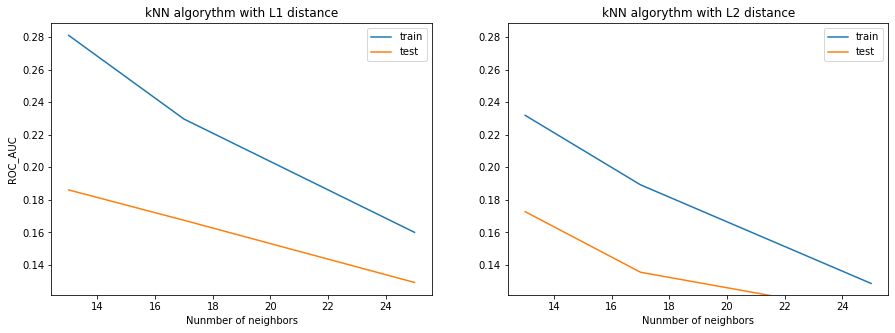

In [38]:
%matplotlib inline
import matplotlib.pyplot as plt

f,ax = plt.subplots(1,2, figsize=(15,5))

# Plot validation curves
ax[0].plot(parameters['n_neighbors'], clf1.cv_results_['mean_train_score'][::2], label='train')
ax[0].plot(parameters['n_neighbors'], clf1.cv_results_['mean_test_score'][::2], label='test')
ax[0].set_title ('kNN algorythm with L1 distance')
ax[0].set_xlabel ('Nunmber of neighbors')
ax[0].set_ylabel ('ROC_AUC')
ax[0].legend()

#Get ylims from the first graph to apply to a second one
ylims = ax[0].get_ylim()

# Plot validation curves
ax[1].plot(parameters['n_neighbors'], clf1.cv_results_['mean_train_score'][1::2], label='train')
ax[1].plot(parameters['n_neighbors'], clf1.cv_results_['mean_test_score'][1::2], label='test')
ax[1].set_ylim(ylims)
ax[1].set_title ('kNN algorythm with L2 distance')
ax[1].set_xlabel ('Nunmber of neighbors')
ax[1].legend()
plt.show()


In [39]:
from sklearn.metrics import accuracy_score, f1_score, roc_auc_score, confusion_matrix 

#create a data frame to store classifiers scores in different metrics
dict_kNN = {'classifier': 'kNN','f1': f1_score(y_test, y_pred_kNN), 'roc_auc': roc_auc_score(y_test, y_pred_kNN),
            'accuracy':accuracy_score(y_test, y_pred_kNN) }
class_res_kNN = pd.Series(data=dict_kNN )
class_res_kNN


classifier         kNN
f1            0.281972
roc_auc       0.586002
accuracy      0.943947
dtype: object

In [40]:
#confusion matrix
conf_matrix_kNN = confusion_matrix(y_test, y_pred_kNN)
print(conf_matrix_kNN)

[[46536   249]
 [ 2547   549]]


#### RandomForest

In [41]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(n_jobs=-1, class_weight = 'balanced_subsample')

parameters = {
    'n_estimators' : [ 200, 300, 400],
    'max_depth' : [3, 7, 15]
    }

#Fit the model, use roc_auc curve as a scoring parameter for optimisation 
clf2 = GridSearchCV (rf, param_grid=parameters, verbose = 1, cv = 3, scoring = 'f1', return_train_score = True)
#by default GridSearchCV uses stratified kfold  for cross-validation
clf2.fit (X_train, y_train)
rf_clf = clf2.best_estimator_
y_pred_rf = clf2.predict (X_test)



Fitting 3 folds for each of 9 candidates, totalling 27 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  27 out of  27 | elapsed: 13.7min finished


In [42]:
clf2.best_estimator_

RandomForestClassifier(class_weight='balanced_subsample', max_depth=15,
                       n_estimators=200, n_jobs=-1)

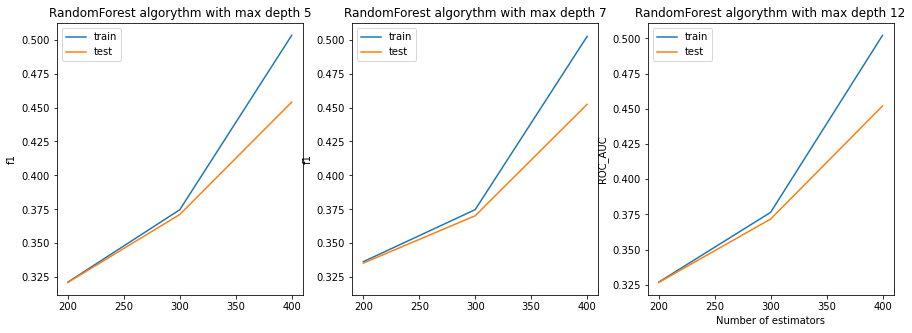

In [43]:

fig, (ax1, ax2, ax3)   = plt.subplots(1, 3,figsize=(15,5) )

# Plot validation curves
ax1.plot(parameters['n_estimators'], clf2.cv_results_['mean_train_score'][::3], label='train')
ax1.plot(parameters['n_estimators'], clf2.cv_results_['mean_test_score'][::3], label='test')
ax1.set_title ('RandomForest algorythm with max depth 5')
ax1.set_ylabel ('f1')
ax1.legend()

#Get ylims from the first graph to apply to a second one
ylims = ax1.get_ylim()

# Plot validation curves
ax2.plot(parameters['n_estimators'], clf2.cv_results_['mean_train_score'][1::3], label='train')
ax2.plot(parameters['n_estimators'], clf2.cv_results_['mean_test_score'][1::3], label='test')
ax2.set_ylabel ('f1')
ax2.set_ylim(ylims)
ax2.set_title ('RandomForest algorythm with max depth 7')
ax2.legend()

# Plot validation curves
ax3.plot(parameters['n_estimators'], clf2.cv_results_['mean_train_score'][2::3], label='train')
ax3.plot(parameters['n_estimators'], clf2.cv_results_['mean_test_score'][2::3], label='test')
ax3.set_ylabel ('f1')
ax3.set_title ('RandomForest algorythm with max depth 12')
ax3.set_xlabel ('Number of estimators')
ax3.set_ylabel ('ROC_AUC')
ax3.legend()


plt.show()


In [44]:
#The graphs look  identical, I want to look at the values
clf2.cv_results_['mean_test_score']

array([0.32106729, 0.33532404, 0.32665685, 0.37118312, 0.37023948,
       0.37168805, 0.45403299, 0.45242927, 0.45199052])

Ok, the scores are really very close to each other

In [45]:
print('Best kNN:', rf_clf)

Best kNN: RandomForestClassifier(class_weight='balanced_subsample', max_depth=15,
                       n_estimators=200, n_jobs=-1)


In [46]:
#create a data frame to store classifiers scores in different metrics
dict_rf = {'classifier': 'RandomForest','f1': f1_score(y_test, y_pred_rf), 'roc_auc': roc_auc_score(y_test, y_pred_rf),
            'accuracy':accuracy_score(y_test,y_pred_rf) }
class_res_rf = pd.Series(data=dict_rf )

In [47]:
#confusion matrix
conf_matrix_rf= confusion_matrix(y_test, y_pred_rf)
print(conf_matrix_rf)

[[40557  6228]
 [  459  2637]]


In [48]:
class_scores = pd.concat([ class_res_kNN, class_res_rf], axis=1)
class_scores.transpose()

,classifier,f1,roc_auc,accuracy
0,kNN,0.281972,0.586002,0.943947
1,RandomForest,0.440933,0.859312,0.865941


#### Logistic Regression

In [49]:
from sklearn.linear_model import SGDClassifier

LogReg = SGDClassifier(loss = 'log', n_jobs=-1, max_iter = 1000, tol = 0.001, class_weight= 'balanced')

parameters = {
    'alpha' : [0.0005, 0.001, 0.005],
    'penalty' : ['l1', 'l2']
    }

#Fit the model
clf3 = GridSearchCV (LogReg, param_grid=parameters, verbose = 1, cv = 3, scoring = 'f1', return_train_score = True)
#by default GridSearchCV uses stratified kfold  for cross-validation
clf3.fit (X_train, y_train)
logreg_clf = clf3.best_estimator_
y_pred_logreg = clf3.predict (X_test)

Fitting 3 folds for each of 6 candidates, totalling 18 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
C:\Users\Tanya\Miniconda3\envs\exts-ml\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:573: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  ConvergenceWarning)
C:\Users\Tanya\Miniconda3\envs\exts-ml\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:573: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  ConvergenceWarning)
C:\Users\Tanya\Miniconda3\envs\exts-ml\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:573: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  ConvergenceWarning)
C:\Users\Tanya\Miniconda3\envs\exts-ml\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:573: ConvergenceWarning: Maximum number of iteration re

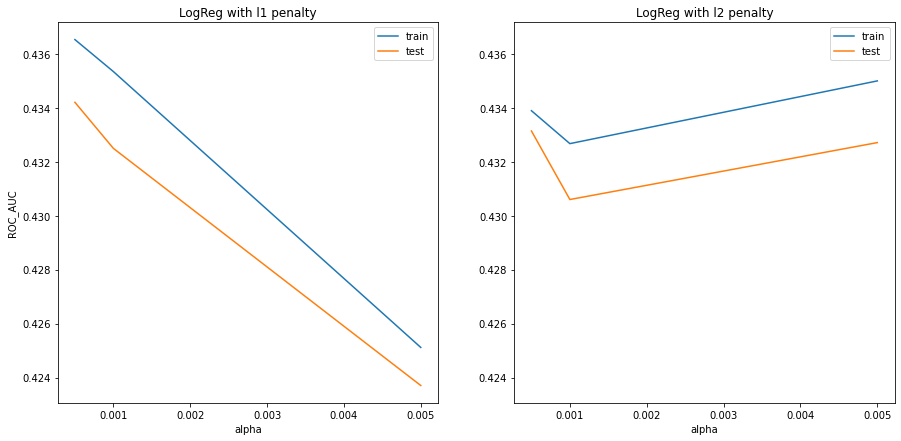

In [50]:
f,ax = plt.subplots(1,2, figsize=(15,7))

# Plot validation curves
ax[0].plot(parameters['alpha'], clf3.cv_results_['mean_train_score'][::2], label='train')
ax[0].plot(parameters['alpha'], clf3.cv_results_['mean_test_score'][::2], label='test')
ax[0].set_title ('LogReg with l1 penalty')
ax[0].set_ylabel ('ROC_AUC')
ax[0].set_xlabel ('alpha')
ax[0].legend()

#Get ylims from the first graph to apply to a second one
ylims = ax[0].get_ylim()

# Plot validation curves
ax[1].plot(parameters['alpha'], clf3.cv_results_['mean_train_score'][1::2], label='train')
ax[1].set_ylim(ylims)
ax[1].plot(parameters['alpha'], clf3.cv_results_['mean_test_score'][1::2], label='test')
ax[1].set_title ('LogReg with l2 penalty')
ax[1].set_xlabel ('alpha')
ax[1].legend()

plt.show()


In [51]:
print('Best Logistis Regression:', logreg_clf)

Best Logistis Regression: SGDClassifier(alpha=0.0005, class_weight='balanced', loss='log', n_jobs=-1,
              penalty='l1')


In [52]:
#create a data frame to store classifiers scores in different metrics
dict_logreg = {'classifier': 'Logistic Regression','f1': f1_score(y_test, y_pred_logreg), 'roc_auc': roc_auc_score(y_test, y_pred_logreg),
            'accuracy':accuracy_score(y_test,y_pred_logreg) }
class_res_logreg = pd.Series(data=dict_logreg )

In [53]:
conf_matrix_logreg = confusion_matrix(y_test, y_pred_logreg)
print(conf_matrix_logreg)

[[39873  6912]
 [  375  2721]]


In [56]:
class_scores = pd.concat([ class_scores, class_res_logreg], axis=1)
class_scores.transpose()

,classifier,f1,roc_auc,accuracy
0,kNN,0.281972,0.586002,0.943947
1,RandomForest,0.440933,0.859312,0.865941
0,Logistic Regression,0.427528,0.865568,0.853912


#### Ensemble of algorithms (Max voter approach)

In [57]:
from sklearn.ensemble import VotingClassifier
eclf1 = VotingClassifier(estimators=[
      ('kNN', kNN_clf), ('rf', rf_clf), ('logreg', logreg_clf )], voting='soft')
eclf1 = eclf1.fit(X_tr_2, y_tr_2)
y_pred_eclf1 = eclf1.predict(X_test)

C:\Users\Tanya\Miniconda3\envs\exts-ml\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:573: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  ConvergenceWarning)


In [58]:
#create a data frame to store classifiers scores in different metrics
dict_eclf1 = {'classifier': 'max vote Ensemble','f1': f1_score(y_test, y_pred_eclf1), 'roc_auc': roc_auc_score(y_test, y_pred_eclf1),
            'accuracy':accuracy_score(y_test,y_pred_eclf1) }
class_res_eclf1 = pd.Series(data=dict_eclf1 )


In [59]:
conf_matrix_eclf1 = confusion_matrix(y_test, y_pred_eclf1)
print(conf_matrix_eclf1)

[[44454  2331]
 [ 1064  2032]]


In [60]:
class_scores = pd.concat([class_scores, class_res_eclf1], axis=1)
class_scores.transpose()

,classifier,f1,roc_auc,accuracy
0,kNN,0.281972,0.586002,0.943947
1,RandomForest,0.440933,0.859312,0.865941
0,Logistic Regression,0.427528,0.865568,0.853912
0,max vote Ensemble,0.544845,0.803254,0.931938


#### Super Learner

In [61]:
#import mlens library
from mlens.ensemble import Subsemble
from sklearn.linear_model import LogisticRegression

#create a scorer
from mlens.metrics import make_scorer
f1_scorer = make_scorer(f1_score, average='micro', greater_is_better=True)
# Passing a scoring function will create cv scores during fitting
# the scorer should be a simple function accepting to vectors and returning a scalar
ensemble = Subsemble(scorer=f1_scorer)
# Build the first layer
ensemble.add([kNN_clf, rf_clf, logreg_clf])

# Attach the final meta estimator
ensemble.add_meta(LogisticRegression(tol=0.0001, max_iter=1000, class_weight = 'balanced', C = 0.01) )

ensemble.fit(X_train, y_train)
y_pred_suplearner= ensemble.predict(X_test)

[MLENS] backend: threading
C:\Users\Tanya\Miniconda3\envs\exts-ml\lib\site-packages\mlens\parallel\_base_functions.py:226: MetricWarning: [kneighborsclassifier.0.1] Could not score kneighborsclassifier. Details:
TypeError("__call__() missing 1 required positional argument: 'y_true'",)
  (name, inst_name, exc), MetricWarning)
C:\Users\Tanya\Miniconda3\envs\exts-ml\lib\site-packages\mlens\parallel\_base_functions.py:226: MetricWarning: [randomforestclassifier.0.1] Could not score randomforestclassifier. Details:
TypeError("__call__() missing 1 required positional argument: 'y_true'",)
  (name, inst_name, exc), MetricWarning)
C:\Users\Tanya\Miniconda3\envs\exts-ml\lib\site-packages\mlens\parallel\_base_functions.py:226: MetricWarning: [randomforestclassifier.0.2] Could not score randomforestclassifier. Details:
TypeError("__call__() missing 1 required positional argument: 'y_true'",)
  (name, inst_name, exc), MetricWarning)
C:\Users\Tanya\Miniconda3\envs\exts-ml\lib\site-packages\mlens\pa

In [62]:
#create a data frame to store classifiers scores in different metrics
dict_suplearn = {'classifier': 'Super Learner','f1': f1_score(y_test, y_pred_suplearner), 'roc_auc': roc_auc_score(y_test,y_pred_suplearner),
            'accuracy':accuracy_score(y_test,y_pred_suplearner) }
class_res_suplearn = pd.Series(data=dict_suplearn )

In [63]:
conf_matrix_suplearner = confusion_matrix(y_test, y_pred_suplearner)
print(conf_matrix_suplearner)

[[40186  6599]
 [  388  2708]]


In [64]:
class_scores = pd.concat([class_scores, class_res_suplearn], axis=1)
class_scores.transpose()

,classifier,f1,roc_auc,accuracy
0,kNN,0.281972,0.586002,0.943947
1,RandomForest,0.440933,0.859312,0.865941
0,Logistic Regression,0.427528,0.865568,0.853912
0,max vote Ensemble,0.544845,0.803254,0.931938
0,Super Learner,0.436669,0.866814,0.859927


### Conclusions on classifiers effiency

Random Forest and Logistic Regression  in SGDClasiifier implementation are doing a good job following the tuning of the parameters. Max Voting approuch (using 'soft' voting, i.e. summing probabilities for classes as opposite to "hard" voting, summing the predicting values) substantialy improves the result.

Untuned SuperLearner perfroms as good as tuned Random Forest and Logistic Regression. I definetely haven't explored all the opportunities the package provides.

It is worth noting that mlens library uses special algorithms that allows it to perform calculations using less computational power. In particular, it allowsto run kNN on a full training set, while the algorithm alone runs on the full set on my PC causes Memory Error.

Also, mlens allows tuning the parameters of its classifiers, thus reducing the manual impact. It also allows to use a number of layers of classifiers.

A link to the mlens documentation: https://mlens.readthedocs.io/en/0.1.x/getting_started/

### Explainability. Defining parameters, that play the biggest role in the classification

#### Random Forest Feature Importance

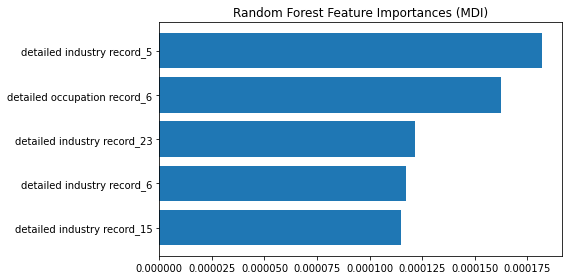

In [73]:
# feature importance ranking using Random Forest methods
tree_feature_importances = (
    rf_clf.feature_importances_)
sorted_idx = tree_feature_importances.argsort()

#N of most important features to display
num_features = 5
sorted_idx_short = sorted_idx[:num_features]

#store the list of important features
list_features_rf_MDI_raw = df_columnds_red2.values[sorted_idx_short]

#clean the list to extract the name of the features using RegEx
import re
list_features_rf_MDI=list(range(len(list_features_rf_MDI_raw)))
for feature in range(len(list_features_rf_MDI_raw)):
        list_features_rf_MDI[feature] = re.split(r'(_+|<+|>+)', list_features_rf_MDI_raw[feature])[0]

#display a bar plot
y_ticks = np.arange(0, len(sorted_idx_short))
fig, ax = plt.subplots(figsize=(8,4))
ax.barh(y_ticks, tree_feature_importances[sorted_idx_short])
ax.set_yticklabels(df_columnds_red2.values[sorted_idx_short])
ax.set_yticks(y_ticks)
ax.set_title("Random Forest Feature Importances (MDI)")
fig.tight_layout()
plt.show()

#### LIME approach

In [66]:
#import the package
import lime
import lime.lime_tabular

LIME provides local model interpretability. LIME modifies a single data sample by tweaking the feature values and observes the resulting impact on the output. 

LIME package allows to interpret the whole set of predicited values, not only one. But here I will pay attention only to feature importance for single predicitons.

In [67]:
#a fucntion to extract names of the desicive features
#import RegEx library
import re

#define a funciton
def extract_feature_name(list_features_raw):
    
    #create a list of predefined size
    list_features=list(range(len(list_features_raw)))
    strip_or_interest = 0
    #for each element of a tuple
    for feature in range(len(list_features_raw)):
        
    #if the first element of a string is a number, choose the third string after a split   
        if re.match('\d+', list_features_raw[feature][0]): 
            strip_or_interest = 2
        else:
            strip_or_interest = 0
            
        #split the text by all the additiond ti the initial feature name and strip out the white spaces
        list_features[feature] = re.split(r'(_+|<=+|>=+|<+|>+)', list_features_raw[feature][0])[strip_or_interest].strip()
        
    return list_features

In [68]:
# Create the Lime Explainer
# Be very careful in setting the order of the class names
# use a small training set to safe time
lime_explainer = lime.lime_tabular.LimeTabularExplainer(
    X_train,
    training_labels=y_train,
    feature_names=df_columnds_red2.values,
    feature_selection="auto",
    class_names=["<50k", ">50k"],
    discretize_continuous=True,
    discretizer="entropy",
)
#pick a sample case from our test set 
row =  110
num_features = sorted_idx_short

Predicted value by Random Forest: 1
Correct class: 1


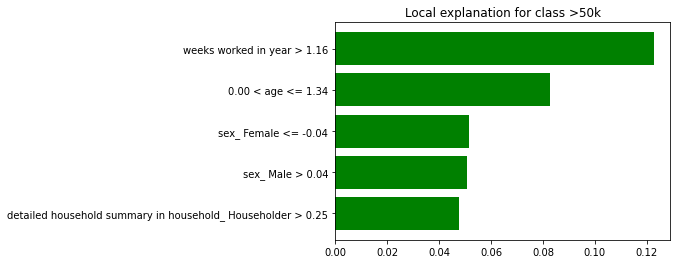

In [74]:
exp = lime_explainer.explain_instance(X_test[row], rf_clf.predict_proba, num_features =num_features )
 
exp.as_pyplot_figure()
print ('Predicted value by Random Forest:', y_pred_rf[row])
print ('Correct class:', y_test[row])

#store the list of important features
list_features_rf_LIME = extract_feature_name(exp.as_list())

Predicted value by kNN: 0
Correct class: 1


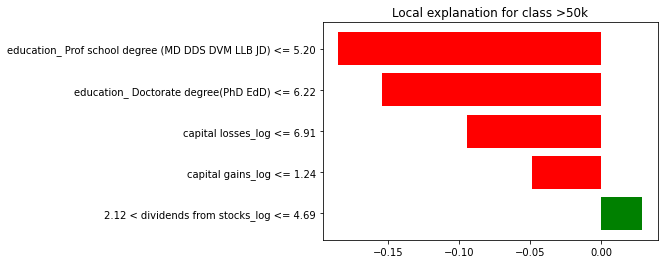

In [75]:
exp = lime_explainer.explain_instance(X_test[row], kNN_clf.predict_proba, num_features = num_features )
 
exp.as_pyplot_figure()
print ('Predicted value by kNN:', y_pred_kNN[row])
print ('Correct class:', y_test[row])

#store the list of important features
list_features_kNN_LIME = extract_feature_name(exp.as_list())

Predicted value by Logistic Regression: 1
Correct class: 1


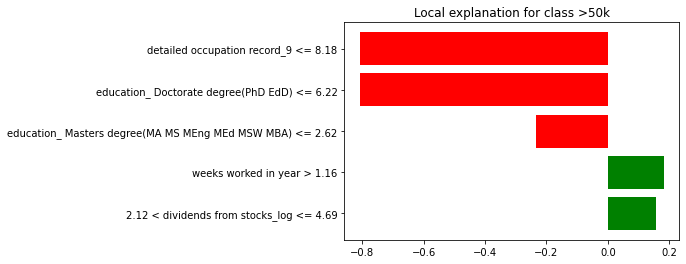

In [76]:
exp = lime_explainer.explain_instance(X_test[row], logreg_clf.predict_proba, num_features = num_features )
 
exp.as_pyplot_figure()
print ('Predicted value by Logistic Regression:', y_pred_logreg[110])
print ('Correct class:', y_test[row])

#store the list of important features
list_features_logreg_LIME = extract_feature_name(exp.as_list())

Predicted value by Max Vouting ensemble: 1
Correct class: 1


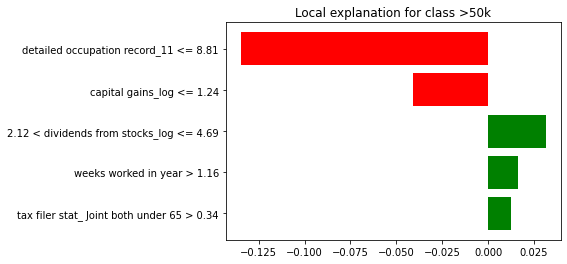

In [77]:
#VotingClassifier does not reurn probabilites for classes
#I need to create a fucntion converting the 1D output array into a 2D one to feed in the lime_explainer
def wrapped_fn(X):
    p = eclf1.predict(X).reshape(-1, 1)
    return np.hstack((1-p, p))

exp = lime_explainer.explain_instance(X_test[row], wrapped_fn, num_features = num_features)
 
exp.as_pyplot_figure()
print ('Predicted value by Max Vouting ensemble:', y_pred_eclf1[row])
print ('Correct class:', y_test[row])

#store the list of important features
list_features_maxvouter_LIME = extract_feature_name(exp.as_list())

Predicted value by Max Vouting ensemble: 1.0
Correct class: 1


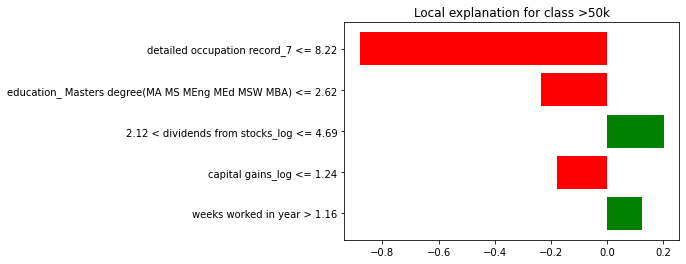

In [78]:
def wrapped_fn_suplearner(X):
    p = ensemble.predict(X).reshape(-1, 1)
    return np.hstack((1-p, p))

exp = lime_explainer.explain_instance(X_test[row], wrapped_fn_suplearner, num_features = num_features )
 
exp.as_pyplot_figure()
print ('Predicted value by Max Vouting ensemble:', y_pred_suplearner[row])
print ('Correct class:', y_test[row])

#store the list of important features
list_features_suplearner_LIME = extract_feature_name(exp.as_list())

In [79]:
#create a list of 5 most important features according to all 6 classifiers
list_features_LIME = list_features_rf_MDI + list_features_rf_LIME+list_features_kNN_LIME+list_features_logreg_LIME+list_features_maxvouter_LIME+list_features_suplearner_LIME
list_features_LIME_ser = pd.Series (list_features_LIME)

#count values
list_features_LIME_ser.value_counts()

education                                  5
detailed industry record                   4
detailed occupation record                 4
weeks worked in year                       4
dividends from stocks                      4
capital gains                              3
sex                                        2
tax filer stat                             1
capital losses                             1
detailed household summary in household    1
age                                        1
dtype: int64

There are a lot of things that can be improved in the impretability part of the project.

I might run LIME explainer on more instances and base my conclusion on more instances. I might also choose only one or few classifiers with the best scores for that. 

Finally, there are another packages that are widely used for model interpretability, as one for calculating SHAP values.

However, I believe that this simple analysis can already provide important insights.

### Conclusion on feature importance

According to that simple analysis of feature importance, it seems that education and occupation/industry are the main factors, underlying the person's income. This is great news, as these things depend on personal choices and achievements.

While dividence from stock, capital gains and losses are connected to the salary, they can also originated from inheretence, and thus reflect and existent economical inequality. On the other hand, a person with high income is likely to have stocks or have changes in capital. So these features do not imply anything in terms of economical inequality by themselves.

Sex and age are also present in the list of important features for income predictions, indicating that they can be a matter of discriminaiton. They, however, seem to play a less important role than education and occupation. Other sensetive characteristics, such as race or place of origin do not occur in this short list and might have less predictive power.